In [30]:
# imports
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,accuracy_score,log_loss
import warnings
from sklearn.svm import SVC
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier

In [31]:
BreastCancer_df = pd.read_csv(r'..\Cases\Wisconsin\BreastCancer.csv',index_col=0)
BreastCancer_df.head()

,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class
Code,,,,,,,,,,
61634,5,4,3,1,2,2,2,3,1,Benign
63375,9,1,2,6,4,10,7,7,2,Malignant
76389,10,4,7,2,2,8,6,1,1,Malignant
95719,6,10,10,10,8,10,7,10,7,Malignant
128059,1,1,1,1,2,5,5,1,1,Benign


In [32]:
X= BreastCancer_df.drop(columns=['Class'])
y= BreastCancer_df['Class']
le= LabelEncoder()
y= le.fit_transform(y)
Dtree= DecisionTreeClassifier(random_state=25,max_depth=None)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=25,stratify=y)


Dtree.fit(X_train,y_train)
y_pred=Dtree.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9285714285714286


In [33]:
# import dtreeviz
# viz=dtreeviz.model(Dtree,X_train,y_train,target_name='Class',feature_names=X_train.columns,class_names=list(BreastCancer_df['Class'].unique()))
# viz.view()

In [34]:
import numpy as np
scores=[]
depth=[2,3,4,5,6,None]
min_sample=[2,10,20,50,75]
min_leaf=[1,10,20,50,75]

for d in depth: 
    for s in min_sample: 
        for l in min_leaf: 
            Dtree= DecisionTreeClassifier(random_state=25,max_depth=d,min_samples_leaf=l,min_samples_split=s)
            Dtree.fit(X_train,y_train) 
            y_pred=Dtree.predict(X_test)
            y_pred_proba=Dtree.predict_proba(X_test)
            scores.append([d,s,l,accuracy_score(y_test,y_pred),roc_auc_score(y_test,y_pred_proba[:,1]),log_loss(y_test,y_pred_proba)],)
scores_df=pd.DataFrame(scores,columns=['depth','min_sample','min_leaf','Accuracy','ROC_AUC-score','log_loss'])
scores_df.sort_values(by='Accuracy',ascending=False,inplace=True)
scores_df.head()

,depth,min_sample,min_leaf,Accuracy,ROC_AUC-score,log_loss
110,6.0,20,1,0.961905,0.980878,0.417376
135,NaN,20,1,0.961905,0.979921,0.420616
30,3.0,10,1,0.957143,0.976701,0.435697
35,3.0,20,1,0.957143,0.976701,0.435697
130,NaN,10,1,0.957143,0.961101,1.071947


In [35]:
best_tree= DecisionTreeClassifier(random_state=25,max_depth=6,min_samples_leaf=1,min_samples_split=20)
best_tree.fit(X_train,y_train) 
y_pred=best_tree.predict(X_test)

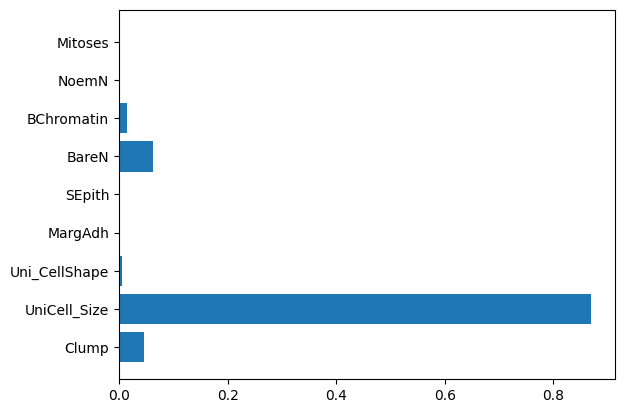

In [36]:
import matplotlib.pyplot as plt
df_imp=pd.DataFrame({'Features':list(X.columns),
                     'Importance':list(best_tree.feature_importances_)})
df_imp.sort_values('Importance')
plt.barh(df_imp['Features'],df_imp['Importance'])
plt.show()